In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [0]:
import plotly.graph_objs as go

In [0]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Data/Vendas/train.csv')

In [6]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [7]:
df[['Outlet_Establishment_Year','Item_MRP','Item_Outlet_Sales']][:5]

,Outlet_Establishment_Year,Item_MRP,Item_Outlet_Sales
0,1999,249.8092,3735.1380
1,2009,48.2692,443.4228
2,1999,141.6180,2097.2700
3,1998,182.0950,732.3800
4,1987,53.8614,994.7052


In [0]:
X = df[['Outlet_Establishment_Year','Item_MRP']]

In [0]:
y = df['Item_Outlet_Sales']

In [0]:
# 70% dos dados para treino e 30% para teste.
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

In [14]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = lreg.predict(x_test)

In [16]:
mse = np.mean((pred - y_test)**2)
mse

1928116.4378303417

In [17]:
coeff = DataFrame(x_train.columns)
coeff['Coeficientes'] = Series(lreg.coef_)
coeff

,0,Coeficientes
0,Outlet_Establishment_Year,-11.186978
1,Item_MRP,15.555956


In [18]:
lreg.score(x_test,y_test)

0.32717776515074964

In [19]:
df['Item_Weight'].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [20]:
#Verificando dados nulos 
df['Item_Weight'].isnull().sum()

1463

In [0]:
df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True)

In [0]:
X = df.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

In [0]:
y = df['Item_Outlet_Sales']

In [0]:
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

In [25]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Predição e MSE
pred = lreg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

1917416.5160852473

In [27]:
#Coeficientes 
coeff = DataFrame(x_train.columns)
coeff['Coeficientes'] = Series(lreg.coef_)
coeff

,0,Coeficientes
0,Outlet_Establishment_Year,-11.061321
1,Item_MRP,15.668118
2,Item_Weight,-1.886669


In [28]:
# r-squared
lreg.score(x_test,y_test)

0.3178723593203742

In [0]:
# Substituindo os valores iguais a 0 pela média.
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.mean(df['Item_Visibility']))

In [0]:
df['Outlet_Establishment_Year'] = 2013 - df['Outlet_Establishment_Year']

In [0]:
df['Outlet_Size'].fillna('Small',inplace=True)

In [32]:
#Transformar em dados numéricos
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [34]:
df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
def generate_labelencoder(atts):
  for attr in atts:
    df[attr] = le.fit_transform(df[attr])
  return df

In [0]:
df = generate_labelencoder(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [38]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,1,2,1,2,1
Item_Visibility,0.0160473,0.0192782,0.0167601,0.066132,0.066132
Item_Type,4,14,10,6,9
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,9,3,9,0,1
Outlet_Establishment_Year,14,4,14,15,26
Outlet_Size,1,1,1,2,0
Outlet_Location_Type,0,2,0,2,2


In [0]:
# O X vai receber todas as colunas da base de dados menos essa duas.
X = df.drop(['Item_Identifier','Item_Outlet_Sales'], axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split( X, df.Item_Outlet_Sales, test_size=0.3)

In [41]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred_cv = lreg.predict(x_test)

In [43]:
#MSE (Mean Squared Error) representa a diferença entre os valores originais e 
#previstos extraídos pelo quadrado da diferença média sobre o conjunto de dados.

mse = np.mean((pred_cv - y_test)**2)
mse

1423807.0238811227

In [44]:
#O quadrado R (coeficiente de determinação) representa o coeficiente de quão bem 
#os valores se ajustam em comparação com os valores originais. O valor de 0 a 1 
#interpretado como porcentagens. Quanto maior o valor, melhor o modelo.

lreg.score(x_test,y_test)

0.4900872968997061

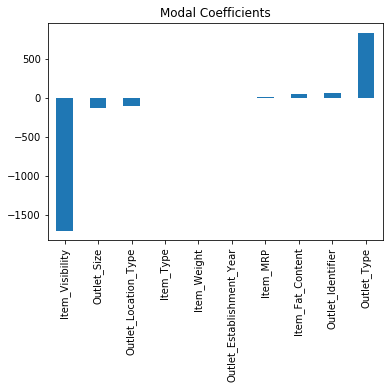

In [45]:
#Verificando a magnitude dos coeficientes

predictors = x_train.columns
coef = Series(lreg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients') 

In [0]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True)

In [47]:
ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [48]:
pred = ridgeReg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

1422263.2059854723

In [49]:
ridgeReg.score(x_test,y_test)

0.49064018949193366

In [0]:
#Verificação do impacto nos coeficientes

def plot_coeficientes_ridge(alpha):
  ridgeReg = Ridge(alpha=alpha, normalize=True)
  ridgeReg.fit(x_train,y_train)
  predictors = x_train.columns
  coef = Series(ridgeReg.coef_,predictors).sort_values()
  print(coef)
  coef.plot(kind='bar', title='Ridge Coefficients')

Item_Visibility             -1707.964840
Outlet_Size                  -123.469751
Outlet_Location_Type          -85.205255
Item_Type                      -3.426870
Item_Weight                    -2.475669
Outlet_Establishment_Year      -0.552807
Item_MRP                       15.673370
Item_Fat_Content               44.249603
Outlet_Identifier              60.020641
Outlet_Type                   813.906460
dtype: float64


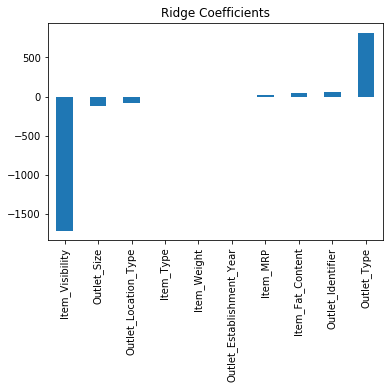

In [51]:
#alpha = 0.01
plot_coeficientes_ridge(0.01)

Item_Visibility             -389.755270
Outlet_Size                  -31.843852
Item_Type                      0.279725
Item_Weight                    0.291773
Outlet_Establishment_Year      0.673264
Item_MRP                       1.438006
Item_Fat_Content               5.566322
Outlet_Identifier              9.309966
Outlet_Location_Type          14.844761
Outlet_Type                   74.910778
dtype: float64


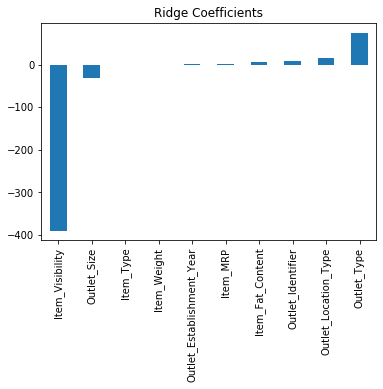

In [53]:
#alpha = 10
plot_coeficientes_ridge(10)

In [0]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)

In [55]:
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
#predição e calculando as métricas

pred = lassoReg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

1423183.8052084371

In [57]:
lassoReg.score(x_test,y_test)

0.49031049225742074

In [0]:
def plot_coeficientes_lasso(alpha):
  lassoReg = Lasso(alpha=alpha, normalize=True)
  lassoReg.fit(x_train,y_train)
  predictors = x_train.columns
  coef = Series(lassoReg.coef_,predictors).sort_values()
  print(coef)
  coef.plot(kind='bar', title='Lasso Coefficients')

Item_Visibility             -1692.141607
Outlet_Size                  -120.646649
Outlet_Location_Type          -99.381383
Item_Type                      -3.351307
Item_Weight                    -2.394414
Outlet_Establishment_Year      -0.517303
Item_MRP                       15.819424
Item_Fat_Content               43.243004
Outlet_Identifier              56.808723
Outlet_Type                   830.239772
dtype: float64


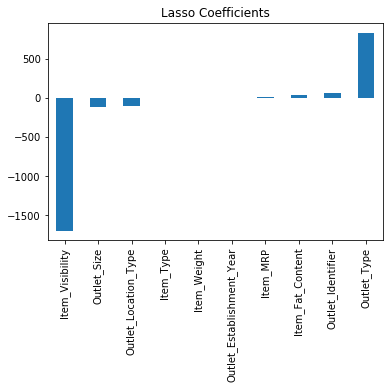

In [59]:
##Magnitude com alpha= 0.01

plot_coeficientes_lasso(0.01)

Item_Visibility             -1094.478588
Outlet_Size                   -45.320635
Item_Weight                    -0.000000
Item_Fat_Content                0.000000
Item_Type                      -0.000000
Outlet_Establishment_Year       0.000000
Outlet_Location_Type           -0.000000
Item_MRP                       15.222336
Outlet_Identifier              61.678331
Outlet_Type                   763.275824
dtype: float64


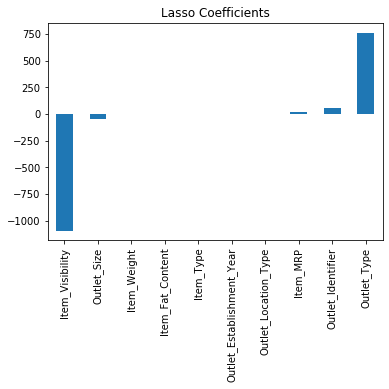

In [60]:
##Magnitude com alpha = 0.5

plot_coeficientes_lasso(0.5)

In [0]:
from sklearn.linear_model import ElasticNet

In [62]:
ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
pred = ENreg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

1501428.440211698

In [64]:
ENreg.score(x_test,y_test)

0.46228848318708377

In [0]:
def plot_coeficientes_elastic(alpha,l1):
  ENreg = ElasticNet(alpha=alpha, l1_ratio=l1, normalize=False)
  ENreg.fit(x_train,y_train)
  predictors = x_train.columns
  coef = Series(ENreg.coef_,predictors).sort_values()
  print(coef)
  coef.plot(kind='bar', title='Elastic Coefficients')

Outlet_Size                 -114.044256
Item_Visibility              -10.772644
Item_Type                     -2.512669
Item_Weight                   -2.022618
Outlet_Establishment_Year      3.525042
Item_MRP                      15.804813
Item_Fat_Content              18.984390
Outlet_Identifier            113.743458
Outlet_Location_Type         140.094506
Outlet_Type                  397.623224
dtype: float64


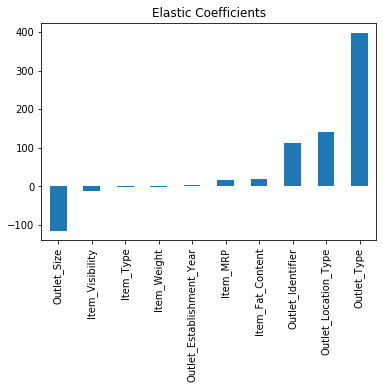

In [66]:
plot_coeficientes_elastic(1,0.5)

Item_Visibility             -1262.751298
Outlet_Size                  -123.473318
Outlet_Location_Type          -92.100769
Item_Type                      -3.358020
Item_Weight                    -2.416587
Outlet_Establishment_Year      -0.854762
Item_MRP                       15.833954
Item_Fat_Content               40.814866
Outlet_Identifier              59.288415
Outlet_Type                   829.196745
dtype: float64


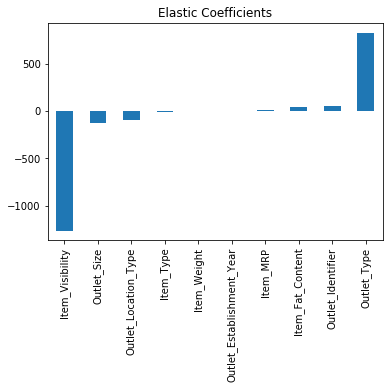

In [67]:
plot_coeficientes_elastic(1,1)

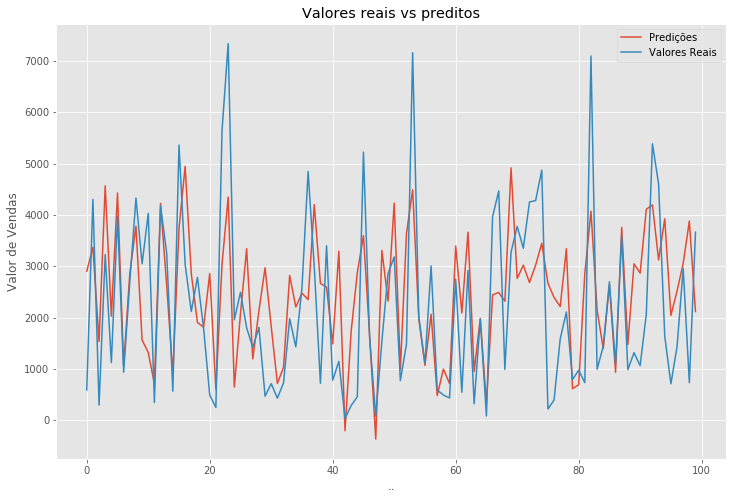

In [68]:
predicoes = pd.DataFrame(pred[:100])

y_teste2= pd.DataFrame(y_test.values[:100])

plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.xlabel('..')
plt.ylabel('Valor de Vendas')
plt.title('Valores reais vs preditos')

plt.plot(y_teste2.index,predicoes)
plt.plot(y_teste2.index,y_teste2)

plt.legend(['Predições','Valores Reais'])
plt.show()